**CREAR DATAFRAME**



*   A partir de RDD
        df = rdd.toDF(['nombre_col1', 'nombre_col2'])
        df = spark.createDataFrame(rdd, schema = schema1) # Con esquema

        (*) Para definir un esquema:
                from pyspark.sql.types import StructType, StructField, IntegerType, StringType, DoubleType
                schema1 = StructType(
                    [
                        # StructField(nombre_columna, tipo_dato, admite_null)
                        StructField('id', IntegerType(), True),
                        StructField('nombre', StringType(), True),
                        StructField('saldo', DoubleType(), True)
                    ]
                )

*   A partir de archivo de texto
        df = spark.read.text('./data.txt')
        df = spark.read.option('header', 'true').option('delimiter', '|').text('./data/data.txt') # si tiene header y delimiter diferente

*   A partir de csv
        df = spark.read.csv('./dataCSV.csv')
        df = spark.read.option('header', 'true').option('inferSchema', 'true').csv('./dataCSV.csv') # Si tiene header y quieres que infiera el esquema

*   A partir de parquet
        df = spark.read.parquet('./data/data.parquet')



**SELECT**: Selecciona las columnas a mostrar

    df.select(nombre_col1, nombre_col2)
  NOTA:

    df.select(nombre_col1, (nombre_col2-nombre_col3))  ❌
    df.select(col(nombre_col1), col(nombre_col2-nombre_col3).alias('alias_col')) ✅

**SELECT EXPR**: Selecciona las columas a mostrar a partit de una expresión

    df.selectExpr('nombre_col1', '(nombre_col2-nombre_col3) as alias_col')

**FILTER** 

    df.filter(col('video_id') == '2kyS6SvSYSE')

**WHERE**

    df.where(col('likes') > 5000)

**DISTINCT**: elimina las filas duplicadas (se considera duplicada si tiene todas las columnas iguales)

    df.distinct()

**DROPDUPLICATES**: elimina las filas duplicadas. DropDuplicates sin parametros es igual a distinct

    df.dropDuplicates(['nombre_col1', 'nombre_col2'])

**SORT**: ordena, por defecto en orden ascendente.

    df.sort('nombre_col1') # menor a mayor

    from pyspark.sql.functions import desc
    df.sort(desc('nombre_col1')) # mayor a menor

**ORDERBY**: igual que sort, solo que es más relacional.

    df.orderBy(col('nombre_col1')) # menor a mayor
    df.orderBy(col('nombre_col1').desc()) # mayor a menor

**WITHCOLUMN**: Agrega una columna

    df.withColumn('nombre_nuevacol', col('nombre_col1') - col('nombre_col2'))

**WITHCOLUMNRENAMED**: Cambia nombre a una columna

    df.withColumnRenamed('nombre_col1', 'nuevo_nombre')

**DROP**: Borra columnas

    df.drop('nombre_col1', 'nombre_col2')

**SAMPLE**: Muestreo. Selecciona aleatoriamente la fracción de filas indicada. WithReplacement = True, se pueden repetir filas, WithReplacement = False (por defecto), cada fila es única.

    df.sample(withReplacement=True, fraction=0.8, seed=1234)

**RANDOMSPLIT**: Se usa para entrenar modelos de ML. Devuelve uno o más df, según la cantidad de pesos que se especifiquen. Si los pesos no suman 1, estos se normalizarán para sumar 1.

    df1, df2 = df.randomSplit([peso1, peso2], seed=1234)

ej: Creo un data frame para entrenamiento del modelo y otro para test.

    df_train, df_test = df.randomSplit([0.8, 0.2], seed=1234)



**Para trabajar con datos faltantes**

* Eliminar filas con al menos un NA. Todas estas opciones sirven:

      df.na.drop()
      df.na.drop('any')
      df.dropna()

* Eliminar filas con NA en las columnas indicadas

      df.na.drop(subset=['nombre_col1', 'nombre_col2'])

* Reemplazar filas NA

      df.fillna(0)     # reemplaza todos los NA
      df.fillna(0, subset=['nombre_col1', 'nombre_col2']) # reemplaza los NA de las columnas indicadas



**Acciones sobre DF**


*   SHOW: muestra las primeras 20 filas del df

        df.show()
        df.show(5, truncate=False) # mostrar 5 filas y no cortar el ancho de las columnas

*   TAKE: toma las n filas que le indicamos como parámetro
        df.take(n)

*   HEAD: toma las primeras n filas
        df.head(n)

*   COLLECT: muestra todo el df. Tener cuidado cuando son muchos datos
        df.collect()

**Agregaciones**

NOTA: from pyspark.sql.functions import count, countDistinct, approx_count_distinct, min, max, sum, sumDistinct, avg

* COUNT: cuenta la cantidad de filas con datos de la columna indicada
      df.select(count('nombre_col1').alias('alias_col1')).show()

* COUNTDISTINCT: cuenta la cantidad de datos distintos de la columna indicada
      df.select(countDistinct('nombre_col1').alias('alias_col1')).show()

* approx_count_distinct: COUNTDISTINCT es costoso, el aproximado es más barato.
      df.select(approx_count_distinct('nombre_col1').alias('alias_col1')).show()

* MIN: entrega el valor mínimo de la columna indicada
      df.select(min('nombre_col1').alias('alias_col1')).show()

* MAX: entrega el valor máximo de la columna indicada
      df.select(max('nombre_col1').alias('alias_col1')).show()

* SUM: suma todos los valores de la columna indicada
      df.select(sum('nombre_col1').alias('alias_col1')).show()

* SUMDISTINCT: suma valores distintos de la columna indicada
      df.select(sumDistinct('nombre_col1').alias('alias_col1')).show()

* AVG: promedio de la columna indicada
      df.select(avg('nombre_col1').alias('alias_col1')).show()


**Agregaciones con agrupación**

group by indica qué columnas agrupar y luego una función de agregación(count, min, max, sum, avg, etc.) indica qué hacer con la agrupación.

Algunas opcines:

    df.groupBy('nombre_col1', 'nombre_col2').count().orderBy(desc('count')).show()
    dg.groupBy('nombre_col1').agg(count('nombre_col2').alias('alias_col2'), min('nombre_col3').alias('alias_col3')).orderBy(desc('alias_col3')).show()


**JOINS**

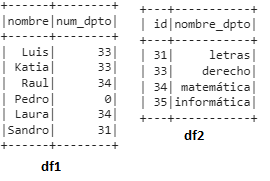
* INNER: filas que están en ambos df
      df1.join(df2, col('nombre_col_df1') == col('nombre_col_df2')) # por defecto es inner
      df1.join(df2, col('nombre_col_df1') == col('nombre_col_df2'), 'inner')
      df1.join(df2).where(col('nombre_col_df1') == col('nombre_col_df2'))
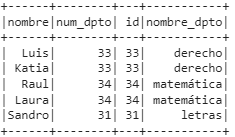

* LEFT: Todas las filas que están en el df1. Las que están en el df2 se les agrega las columnas con info, las que no se llenan esas columnas con null
      df1.join(df2, col('nombre_col_df1') == col('nombre_col_df2'), 'left')

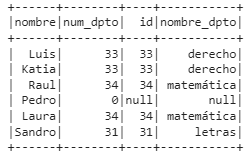

* RIGHT: Todas las filas que están en el df2. Las que están en el df1 se les agrega las columnas con info, las que no se llenan esas columnas con null
      df1.join(df2, col('nombre_col_df1') == col('nombre_col_df2'), 'right')

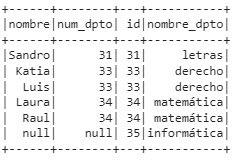

* OUTER: Todas las filas de ambos df. Las que están en ambos las columnas se completan con la info, a las que le falta alguno de los dos se completan con null.
      df1.join(df2, col('nombre_col_df1') == col('nombre_col_df2'), 'outer')

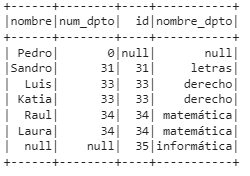

* CROSS: crea una fila del df1 con cada elemento del del df2. Cuidado al usarlo, puede usar mucha memoria (filas df1 * filas df2)
      df1.crossJoin(df2)
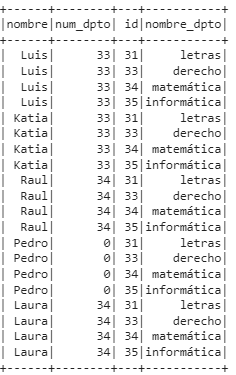

* LEFT ANTI: filas que están en el df1 pero no en el df2
      df1.join(df2, col('nombre_col_df1') == col('nombre_col_df2'), 'left_anti')
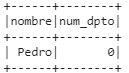

* LEFT SEMI: filas que están en el df1 y en el df2, sin agregar las columnas del df2
      df1.join(df2, col('nombre_col_df1') == col('nombre_col_df2'), 'left_semi')
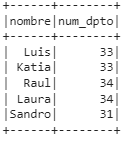

**FUNCIONES**
 * Fechas:
        df.select(to_date(col('nombre_col1'), 'dd-MM-yyyy')) # Transforma string a date
        df.select(to_timestamp(col('nombre_col1'), 'dd-MM-yyyy mm:ss')) # Transforma string a timestamp
        df.select(date_format(col('nombre_col1'), 'dd-MM-yyyy mm:ss')) # Cambia el formato de una fecha
        df.select(datediff(col('nombre_col1'), col('nombre_col2'))) # Días entre dos fechas
        df.select(months_between(col('nombre_col1'), col('nombre_col2'))) # Meses entre dos fechas
        df.select(last_day(col('nombre_col1'))) # Último día del mes de la fecha
        df.select(date_add(col('nombre_col1'), n)) # Agrega n días a la fecha
        df.select(date_sub(col('nombre_col1'), n)) # Resta n días a la fecha
        df.select(year(col('nombre_col1'))) # obtener el año
        df.select(month(col('nombre_col1'))) # obtener el mes
        df.select(hour(col('nombre_col1'))) # obtener hora
        df.select(minute(col('nombre_col1'))) # obtener minutos
        df.select(second(col('nombre_col1'))) # obtener el segundos
        df.select(dayofmonth(col('nombre_col1'))) # obtener el número de día del mes
        df.select(dayofyear(col('nombre_col1'))) # obtener el número de día del año

 * String:

        df.select(ltrim('nombre_col1')) # Eliminar espacios a la izquierda
        df.select(rtrim('nombre_col1')) # Eliminar espacios a la derecha
        df.select(trim('nombre_col1')) # Eliminar espacios de la izquierda y derecha
        df.select(lpad('nombre_col1'),n,'-') # Rellena a la izquierda (n es la cantidad de caracteres hasta el que quiero rellenar con el str '-')
        df.select(rpad('nombre_col1'),n,'-') # Rellena a la derecha (n es la cantidad de caracteres hasta el que quiero rellenar con el str '-')
        df.select(concat_ws(col('nombre_col1'), col('nombre_col2'))) # Concatenar columnas
        df.select(lower(col('nombre_col1'))) # Minúscula
        df.select(upper(col('nombre_col1'))) # Mayúscula
        df.select(initcap(col('nombre_col1'))) # Mayúscula primer caracter (nompropio)
        df.select(reverse(col('nombre_col1'))) # Dar vuelta el string
        df.select(regexp_replace(col('nombre_col1'), 'str1', 'str2') # reemplaza el str1 por el str2

 * Colecciones

         df.select(size(col('nombre_col1'))) # tamaño del array
         df.select(sort_array(col('nombre_col1'))) # ordena
         df.select(array_contains(col('nombre_col1'), 'str')) # entrega true o false si el str está en el array
         df.select(explode(col('nombre_col1'))) # dividir cada elemento del arreglo en una fila

* When: para asignar nuevo valor según valores de la columna
        df.select(when(col('nombre_col1') == 1, 'pagado').when(col('nombre_col1') == 2, 'sin pagar').otherwise('sin iniciar'))

* Fórmulas definidas por usuario (UDF)

        def funcion_creada(a):
            return a
        
        from pyspark.sql.functions import udf
        from pyspark.sql.types import StringType

        funcion_udf = udf(lambda x: funcion_creada(x), StringType()) # StringType() es el tipo de dato que retorna la función

        df.select(funcion_udf(col('nombre_col1')))
